In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

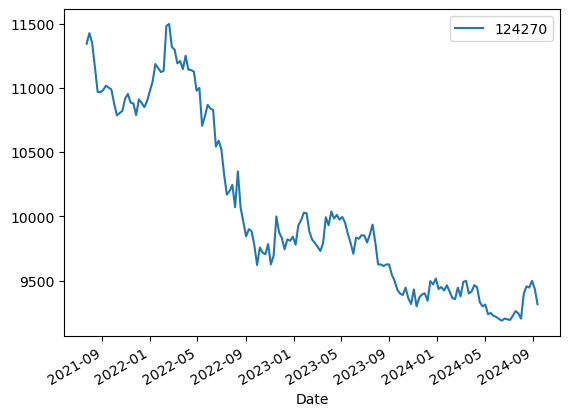

In [63]:
prices = pd.read_csv(r"D:/Projects/Regression/RolexPrices.csv")
prices["Date"]=pd.to_datetime(prices["Date"])
prices["124270"]=pd.to_numeric(prices["124270"])

prices.plot(x="Date", y="124270")
plt.show(block=False)

In [65]:
prices["DateConverted"]=prices["Date"].map(pd.Timestamp.toordinal) 
X = prices[["DateConverted"]]
y = prices["124270"]

prices.head
prices.shape
prices.describe
print(X)
print(y)

     DateConverted
0           737994
1           738001
2           738008
3           738015
4           738022
..             ...
158         739114
159         739121
160         739128
161         739135
162         739142

[163 rows x 1 columns]
0      11343.5
1      11426.0
2      11350.0
3      11164.0
4      10969.0
        ...   
158     9454.0
159     9445.0
160     9497.5
161     9434.0
162     9315.0
Name: 124270, Length: 163, dtype: float64


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

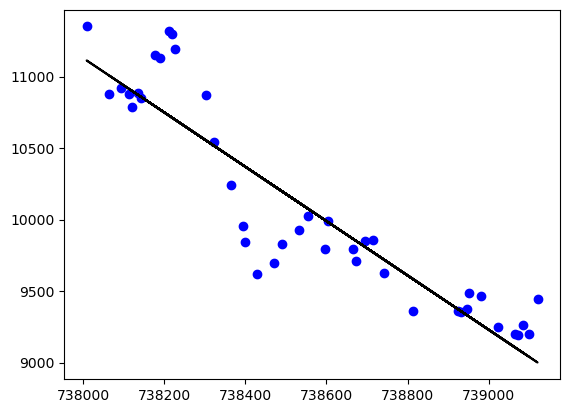

In [69]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_pred, color="black")
plt.show(block=False)

In [71]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

print("MSE: %.2f" % mean_squared_error(y_test,y_pred))
print("R_2 score: %.2f" %r2_score (y_test,y_pred))

     Actual     Predicted
135  9489.5   9319.651663
115  9361.0   9585.255422
131  9364.0   9372.772415
55   9954.0  10382.066698
95   9708.0   9850.859181
MSE: 80752.89
R_2 score: 0.84


In [73]:
#Multiple Regression for two different models

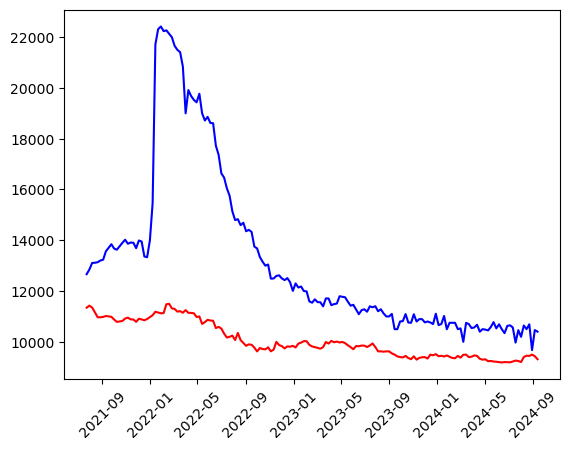

In [75]:
prices = pd.read_csv(r"D:/Projects/Regression/RolexPrices.csv")

prices["Date"]=pd.to_datetime(prices["Date"])
prices["124270"]=pd.to_numeric(prices["124270"])
prices["124300"]=pd.to_numeric(prices["124300"])

#prices.shape
#prices.head

#prices.plot(x="Date", y="124270")
#prices.plot(x="Date", y="124300")
plt.xticks(rotation=45)
plt.plot(prices["Date"], prices["124270"], color="red")
plt.plot(prices["Date"], prices["124300"], color="blue")
plt.show(block=False)

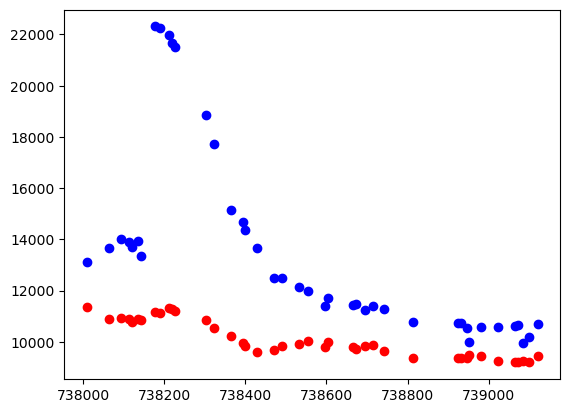

In [77]:
prices["DateConverted"]=prices["Date"].map(pd.Timestamp.toordinal)
X = prices[["DateConverted"]]
y = prices[["124270","124300"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

plt.scatter(X_test["DateConverted"], y_test["124270"], color="red")
plt.scatter(X_test["DateConverted"], y_test["124300"], color="blue")
plt.show(block=False)

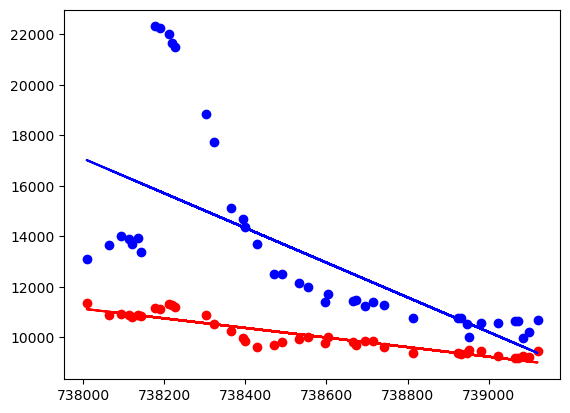

In [79]:
y_pred_df = pd.DataFrame(y_pred, columns=["124270_pred","124300_pred"])
plt.scatter(X_test["DateConverted"], y_test["124270"], color="red")
plt.scatter(X_test["DateConverted"], y_test["124300"], color="blue")
plt.plot(X_test["DateConverted"], y_pred_df["124270_pred"], color="red")
plt.plot(X_test["DateConverted"], y_pred_df["124300_pred"], color="blue")
plt.show(block=False)

In [81]:
#Polynomial regression to better suit the highly deviating blue curve

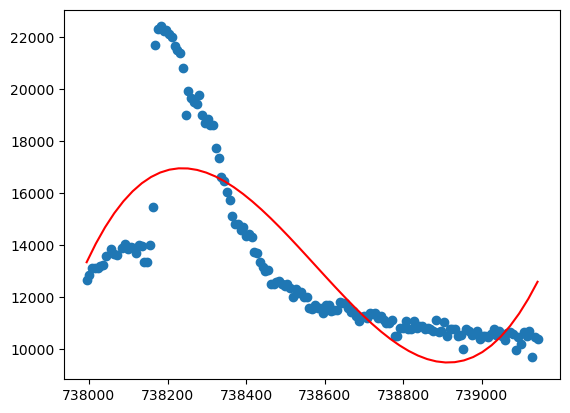

In [83]:
prices = pd.read_csv(r"D:/Projects/Regression/RolexPrices.csv")

prices["Date"]=pd.to_datetime(prices["Date"])
prices["124300"]=pd.to_numeric(prices["124300"])

prices["DateConverted"]=prices["Date"].map(pd.Timestamp.toordinal)

x = prices[["DateConverted"]]
y = prices["124300"]

PolynomialModel = np.poly1d(np.polyfit(x["DateConverted"], y, 3))
myline = np.linspace(prices["DateConverted"].min(),prices["DateConverted"].max())

plt.scatter(x, y,)
plt.plot(myline, PolynomialModel(myline), color = "red")
plt.show(block=False)